In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.ensemble import EasyEnsembleClassifier

import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from base_learning import BaseLearningAlgorithm
from os.path import join
from learning_algorithms import *
from balancer import *
from utils import *

RAW_DATA_PATH = r"C:\Users\shami\OneDrive\Desktop\Master_Thesis_Data\Raw_Data"
PREPARED_DATA_PATH = r"C:\Users\shami\OneDrive\Desktop\Master_Thesis_Data\Prepared_Datasets"
TEST_DATA_PATH = r"C:\Users\shami\OneDrive\Desktop\Master_Thesis_Data\Test_Datasets"
TRAIN_DATA_PATH = r"C:\Users\shami\OneDrive\Desktop\Master_Thesis_Data\Train_Datasets"

In [2]:
df_train = pd.read_excel(join(TRAIN_DATA_PATH,"cc_fraud_2_train.xlsx"))
df_test = pd.read_excel(join(TEST_DATA_PATH,"cc_fraud_2_test.xlsx"))

In [3]:
s = SVMClassifier()

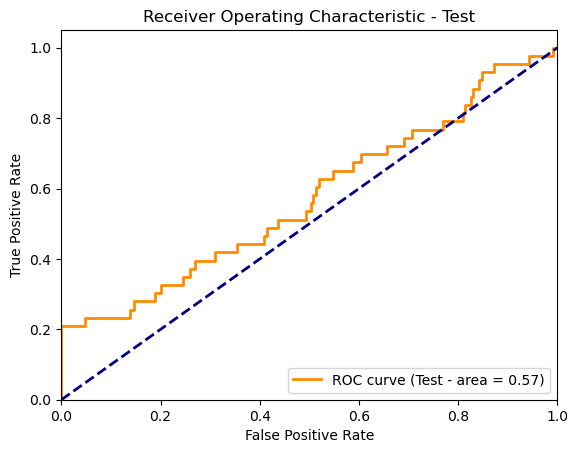

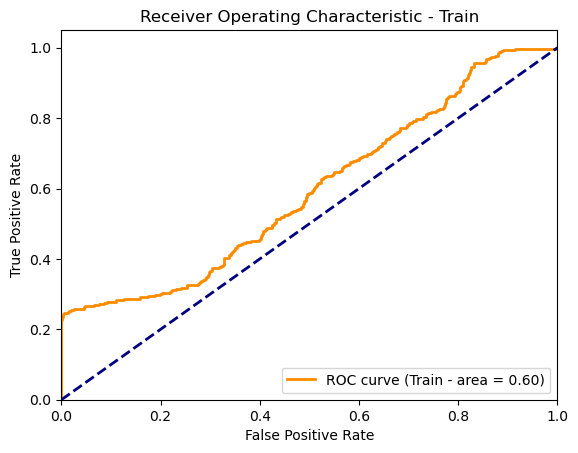

,Model,Dataset,Accuracy,F1 Score,Precision,Recall,AUC Score
0,SimpleSVC,Train,0.97972,0.0,0.0,0.0,0.595426
1,SimpleSVC,Test,0.98252,0.0,0.0,0.0,0.574583


In [4]:
s.train_eval(df_train.drop("Class",axis=1), df_train["Class"], df_test.drop("Class",axis=1), df_test["Class"])

In [5]:
s2 = SVMClassifier(class_weight='balanced')

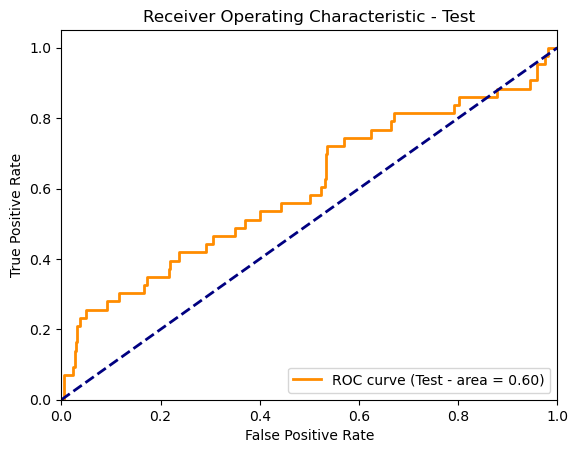

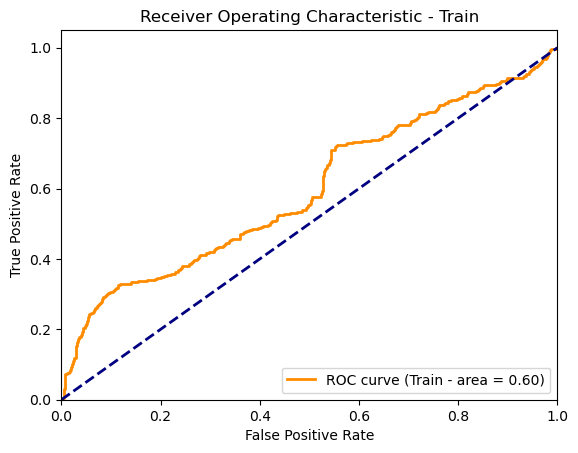

,Model,Dataset,Accuracy,F1 Score,Precision,Recall,AUC Score
0,SimpleSVC,Train,0.460885,0.050589,0.026231,0.708241,0.596118
1,SimpleSVC,Test,0.456504,0.044317,0.022861,0.720930,0.600543


In [6]:
s2.train_eval(df_train.drop("Class",axis=1), df_train["Class"], df_test.drop("Class",axis=1), df_test["Class"])

In [3]:
x = XGBoostClassifier()

C:\Users\shami\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


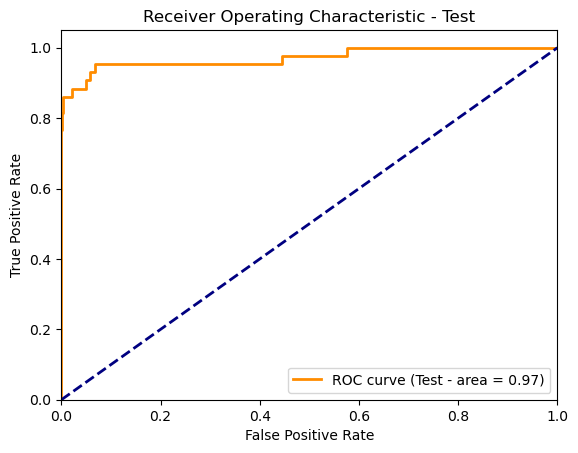

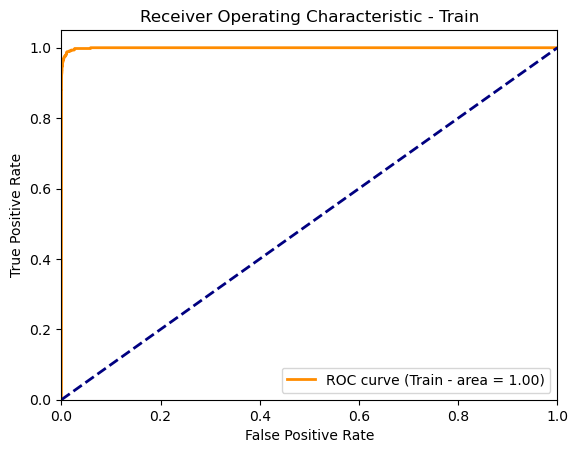

,Model,Dataset,Accuracy,F1 Score,Precision,Recall,AUC Score
0,SimpleXGB,Train,0.997425,0.933020,0.987562,0.884187,0.999400
1,SimpleXGB,Test,0.995528,0.860759,0.944444,0.790698,0.971452


In [4]:
x.train_eval(df_train.drop("Class",axis=1), df_train["Class"], df_test.drop("Class",axis=1), df_test["Class"])

In [7]:
x2 = XGBoostClassifier(alg_name="XGB_Class_Weights", class_weight=get_scale_weight(df_train["Class"]))

C:\Users\shami\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


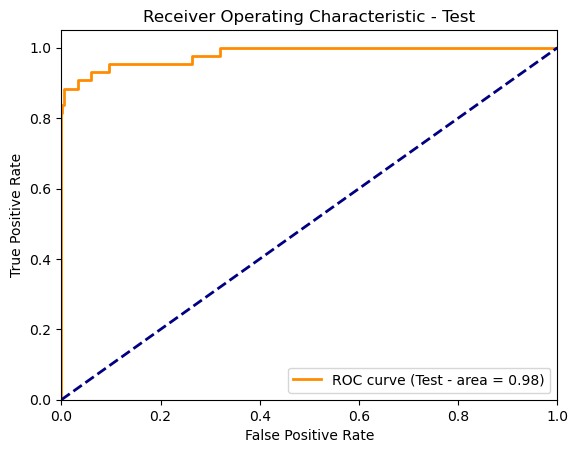

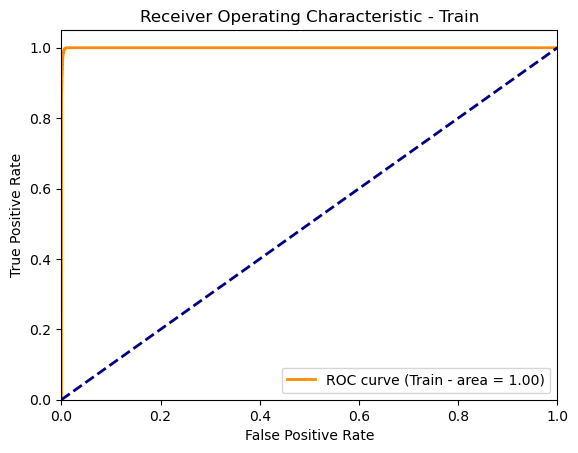

,Model,Dataset,Accuracy,F1 Score,Precision,Recall,AUC Score
0,XGB_Class_Weights,Train,0.994038,0.871345,0.774697,0.995546,0.999670
1,XGB_Class_Weights,Test,0.989431,0.745098,0.644068,0.883721,0.981805


In [8]:
x2.train_eval(df_train.drop("Class",axis=1), df_train["Class"], df_test.drop("Class",axis=1), df_test["Class"])

In [3]:
l = LogisticRegressionClassifier()

C:\Users\shami\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


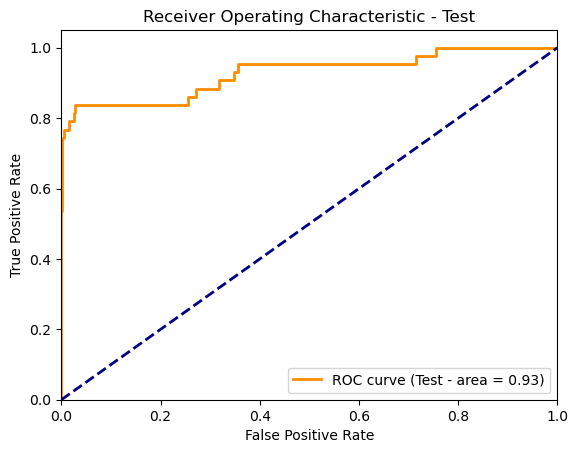

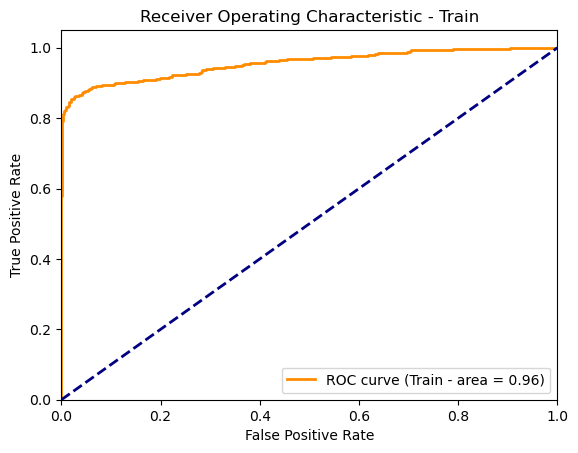

,Model,Dataset,Accuracy,F1 Score,Precision,Recall,AUC Score
0,SimpleLogisticRegression,Train,0.993948,0.840855,0.900763,0.788419,0.955302
1,SimpleLogisticRegression,Test,0.993902,0.810127,0.888889,0.744186,0.927875


In [4]:
l.train_eval(df_train.drop("Class",axis=1), df_train["Class"], df_test.drop("Class",axis=1), df_test["Class"])

In [5]:
l2 = LogisticRegressionClassifier(alg_name="Logistic_Cost_Optimized", class_weight='balanced')

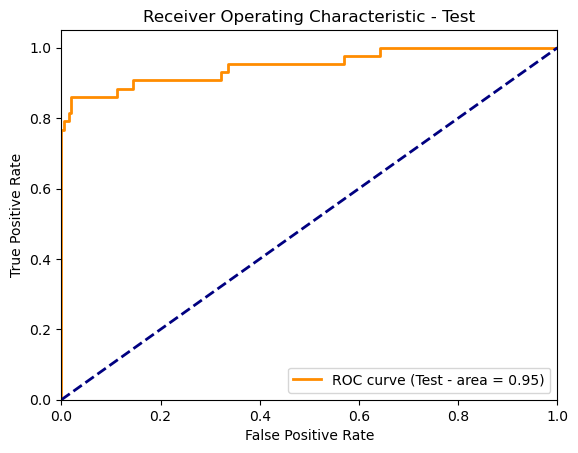

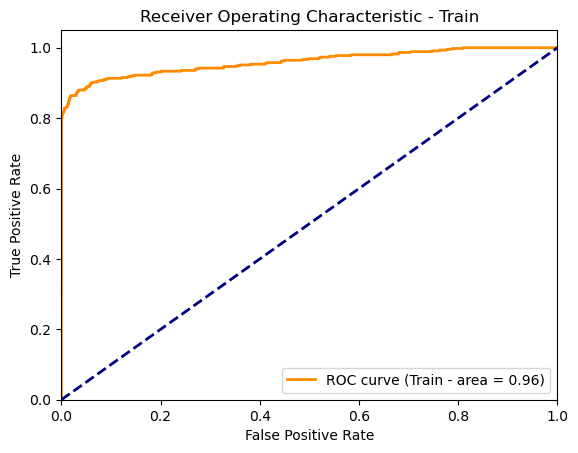

,Model,Dataset,Accuracy,F1 Score,Precision,Recall,AUC Score
0,Logistic_Cost_Optimized,Train,0.957543,0.456647,0.308353,0.879733,0.959300
1,Logistic_Cost_Optimized,Test,0.952439,0.387435,0.250000,0.860465,0.949091


In [6]:
l2.train_eval(df_train.drop("Class",axis=1), df_train["Class"], df_test.drop("Class",axis=1), df_test["Class"])

In [3]:
ros = RandomOverSamplerBalancer()

In [4]:
ros.balance_data(df_train.drop("Class",axis=1), df_train["Class"])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,125277,-0.608609,-0.825019,-2.417397,1.321635,0.861187,0.950105,0.681671,-2.990315,-1.200449,...,-0.689015,0.788374,-0.799384,-0.275718,0.450420,-0.348779,0.085367,0.439855,628.60,0
1,115751,1.971678,-0.411368,0.130392,0.483816,-1.017784,-0.512864,-0.816013,0.011238,1.540340,...,0.068713,0.421184,0.275393,0.039538,-0.380207,-0.416809,0.060474,-0.026463,1.00,0
2,55987,1.215795,-1.576220,0.539621,-1.461160,-1.589632,0.204417,-1.318006,0.159282,-1.785281,...,0.060994,0.312404,-0.120017,-0.327591,0.225643,-0.080922,0.039925,0.029165,126.00,0
3,150076,1.838362,-0.405455,-0.913792,1.591264,-0.076964,0.069420,-0.086959,0.051986,1.275876,...,-0.317062,-0.742451,0.228169,0.611284,0.008225,-0.849598,0.017942,-0.028915,70.00,0
4,160634,2.129101,-0.873931,-1.635981,-1.176035,-0.073736,-0.412121,-0.289237,-0.223462,-0.776604,...,-0.034599,-0.262403,0.091163,-1.095939,-0.098260,-0.387646,-0.046397,-0.065703,73.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43377,52934,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,...,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,0.76,1
43378,93904,-11.320633,7.191950,-13.179083,9.099552,-10.094749,-2.440115,-14.184337,4.452503,-6.241960,...,1.082235,-0.350563,0.483044,0.661133,-0.396522,-0.413315,-0.997548,-0.235036,37.93,1
43379,64412,-1.348042,2.522821,-0.782432,4.083047,-0.662280,-0.598776,-1.943552,-0.329579,-1.853274,...,1.079871,-0.352026,-0.218358,0.125866,-0.074180,0.179116,0.612580,0.234206,1.00,1
43380,96291,-3.552173,5.426461,-3.731810,6.679062,-2.187543,2.433940,-8.748110,-12.108284,-2.856359,...,-5.688990,2.510980,0.953933,-0.542506,-0.620152,0.406013,0.023025,0.164741,33.59,1


In [3]:
rus = RandomUnderSamplerBalancer()
rus.balance_data(df_train.drop("Class",axis=1), df_train["Class"])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
20783,87248,-0.174572,1.792954,0.031365,3.295184,2.029056,0.356331,1.363791,-0.163325,-1.578036,...,0.046371,0.438434,-0.376659,0.226100,-0.083192,0.154535,0.013162,0.010495,10.35,0
4515,75092,-0.242161,-0.009849,1.229026,-2.279903,-0.653779,-0.742128,0.226057,-0.290467,-0.122761,...,-0.372791,-0.229595,-0.039633,0.070929,-0.478694,0.014409,0.128248,-0.014202,15.00,0
7280,160343,1.580022,-1.574690,-2.296820,-1.546218,1.522184,3.583308,-0.711563,0.886931,1.402897,...,-0.292592,-1.280469,0.305036,0.713146,-0.664500,0.194361,-0.069516,-0.016367,239.38,0
3016,139872,2.104227,-0.133765,-1.373465,0.264101,0.122038,-0.835344,0.122764,-0.248511,0.703324,...,-0.341479,-0.890143,0.261066,-0.675331,-0.232990,0.240988,-0.077201,-0.068015,5.00,0
8192,150683,2.015007,0.060799,-1.794516,0.577365,0.355022,-0.612241,-0.034240,-0.090157,0.590005,...,-0.002936,0.294599,-0.014487,-0.534234,0.100403,0.649404,-0.041007,-0.045502,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22050,58067,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,...,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,1.00,1
22052,51155,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,...,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,99.99,1
22054,43028,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27,1
22102,7672,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,...,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1.00,1


In [3]:
smt = SMOTEBalancer()
smt.balance_data(df_train.drop("Class",axis=1), df_train["Class"])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,125277,-0.608609,-0.825019,-2.417397,1.321635,0.861187,0.950105,0.681671,-2.990315,-1.200449,...,-0.689015,0.788374,-0.799384,-0.275718,0.450420,-0.348779,0.085367,0.439855,628.600000,0
1,115751,1.971678,-0.411368,0.130392,0.483816,-1.017784,-0.512864,-0.816013,0.011238,1.540340,...,0.068713,0.421184,0.275393,0.039538,-0.380207,-0.416809,0.060474,-0.026463,1.000000,0
2,55987,1.215795,-1.576220,0.539621,-1.461160,-1.589632,0.204417,-1.318006,0.159282,-1.785281,...,0.060994,0.312404,-0.120017,-0.327591,0.225643,-0.080922,0.039925,0.029165,126.000000,0
3,150076,1.838362,-0.405455,-0.913792,1.591264,-0.076964,0.069420,-0.086959,0.051986,1.275876,...,-0.317062,-0.742451,0.228169,0.611284,0.008225,-0.849598,0.017942,-0.028915,70.000000,0
4,160634,2.129101,-0.873931,-1.635981,-1.176035,-0.073736,-0.412121,-0.289237,-0.223462,-0.776604,...,-0.034599,-0.262403,0.091163,-1.095939,-0.098260,-0.387646,-0.046397,-0.065703,73.040000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43377,83970,-0.501030,2.567389,-4.325485,4.879482,-1.855119,-0.815931,-4.794431,1.292431,-2.955691,...,0.760991,-0.424098,-0.320759,-0.750700,0.955320,0.329392,1.132152,0.566509,0.865628,1
43378,8629,-2.135870,3.617738,-4.504022,2.738974,-2.122217,-2.340045,-4.238144,1.703331,-1.320199,...,0.647642,-0.504944,-0.001824,0.071575,0.088281,0.308096,0.537620,0.288932,1.000000,1
43379,96073,-8.129229,7.768173,-8.747997,8.157640,-5.912695,1.501319,-13.480682,-9.877596,-4.748574,...,-5.453198,2.007990,1.244716,-0.255128,-0.652915,0.196731,-0.974861,-0.045945,23.116349,1
43380,41210,-8.864819,6.166997,-12.107932,6.784415,-8.460689,-3.740807,-12.600864,5.876136,-6.242665,...,2.205520,-0.318155,-0.033931,0.412434,-0.032850,0.509865,0.668681,-0.018385,32.845797,1


In [3]:
asyn = ADASYNBalancer()
asyn.balance_data(df_train.drop("Class",axis=1), df_train["Class"])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,125277,-0.608609,-0.825019,-2.417397,1.321635,0.861187,0.950105,0.681671,-2.990315,-1.200449,...,-0.689015,0.788374,-0.799384,-0.275718,0.450420,-0.348779,0.085367,0.439855,628.600000,0
1,115751,1.971678,-0.411368,0.130392,0.483816,-1.017784,-0.512864,-0.816013,0.011238,1.540340,...,0.068713,0.421184,0.275393,0.039538,-0.380207,-0.416809,0.060474,-0.026463,1.000000,0
2,55987,1.215795,-1.576220,0.539621,-1.461160,-1.589632,0.204417,-1.318006,0.159282,-1.785281,...,0.060994,0.312404,-0.120017,-0.327591,0.225643,-0.080922,0.039925,0.029165,126.000000,0
3,150076,1.838362,-0.405455,-0.913792,1.591264,-0.076964,0.069420,-0.086959,0.051986,1.275876,...,-0.317062,-0.742451,0.228169,0.611284,0.008225,-0.849598,0.017942,-0.028915,70.000000,0
4,160634,2.129101,-0.873931,-1.635981,-1.176035,-0.073736,-0.412121,-0.289237,-0.223462,-0.776604,...,-0.034599,-0.262403,0.091163,-1.095939,-0.098260,-0.387646,-0.046397,-0.065703,73.040000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43246,41298,-13.322084,6.813906,-13.353369,8.733676,-11.128207,-2.874720,-14.447816,8.341744,-7.932817,...,2.857941,0.266291,-0.648385,0.687020,0.214878,0.236566,-1.156672,-0.603108,16.278568,1
43247,41248,-11.211345,6.306286,-13.983295,7.412459,-10.061569,-3.711270,-13.647482,7.219857,-6.497478,...,2.326287,-0.428527,-0.324651,0.478784,-0.069128,0.408531,-0.063366,-0.451374,44.323335,1
43248,41309,-13.782691,6.369130,-14.120572,5.926808,-12.653668,-3.110289,-15.320830,8.941633,-5.726989,...,3.017237,0.834534,-0.297902,0.748603,0.080895,-0.385714,-1.434388,-0.668948,12.938507,1
43249,41250,-11.259273,6.314203,-13.948042,7.452992,-10.081088,-3.684782,-13.665225,7.241710,-6.533511,...,2.336708,-0.417281,-0.339767,0.483108,-0.063375,0.401718,-0.085622,-0.453429,44.116704,1


In [3]:
tl = TomekLinksBalancer()
tl.balance_data(df_train.drop("Class",axis=1), df_train["Class"])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,125277,-0.608609,-0.825019,-2.417397,1.321635,0.861187,0.950105,0.681671,-2.990315,-1.200449,...,-0.689015,0.788374,-0.799384,-0.275718,0.450420,-0.348779,0.085367,0.439855,628.60,0
1,115751,1.971678,-0.411368,0.130392,0.483816,-1.017784,-0.512864,-0.816013,0.011238,1.540340,...,0.068713,0.421184,0.275393,0.039538,-0.380207,-0.416809,0.060474,-0.026463,1.00,0
2,55987,1.215795,-1.576220,0.539621,-1.461160,-1.589632,0.204417,-1.318006,0.159282,-1.785281,...,0.060994,0.312404,-0.120017,-0.327591,0.225643,-0.080922,0.039925,0.029165,126.00,0
3,150076,1.838362,-0.405455,-0.913792,1.591264,-0.076964,0.069420,-0.086959,0.051986,1.275876,...,-0.317062,-0.742451,0.228169,0.611284,0.008225,-0.849598,0.017942,-0.028915,70.00,0
4,160634,2.129101,-0.873931,-1.635981,-1.176035,-0.073736,-0.412121,-0.289237,-0.223462,-0.776604,...,-0.034599,-0.262403,0.091163,-1.095939,-0.098260,-0.387646,-0.046397,-0.065703,73.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21994,126203,0.302748,-0.648969,0.891623,-1.231705,-0.482156,1.823301,-1.137737,0.545585,-2.315947,...,0.030463,0.723651,-0.049738,-1.645005,-0.962224,0.348735,0.297464,0.156884,8.70,0
21995,71116,-0.778253,0.130171,2.330368,1.743399,-0.602476,0.995023,0.315305,0.375928,0.519821,...,-0.253331,-0.519313,0.220585,0.059610,-0.079110,-0.389913,0.152509,0.133106,126.25,0
21996,61944,-2.242599,0.091694,1.335811,0.234568,1.097002,0.989207,-0.325398,-0.368086,0.275580,...,0.594285,-0.007640,-0.503496,-0.533261,-0.520751,0.270840,-0.005266,-0.658016,10.67,0
21997,167162,1.969201,-0.119482,-0.924658,1.481338,0.205727,0.145815,-0.042529,-0.032783,1.064173,...,-0.353798,-0.655984,0.218802,0.451144,0.129211,-0.838737,0.034751,-0.036837,16.59,0


In [3]:
stb = SMOTETomekBalancer()
stb.balance_data(df_train.drop("Class",axis=1), df_train["Class"])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,125277,-0.608609,-0.825019,-2.417397,1.321635,0.861187,0.950105,0.681671,-2.990315,-1.200449,...,-0.689015,0.788374,-0.799384,-0.275718,0.450420,-0.348779,0.085367,0.439855,628.600000,0
1,115751,1.971678,-0.411368,0.130392,0.483816,-1.017784,-0.512864,-0.816013,0.011238,1.540340,...,0.068713,0.421184,0.275393,0.039538,-0.380207,-0.416809,0.060474,-0.026463,1.000000,0
2,150076,1.838362,-0.405455,-0.913792,1.591264,-0.076964,0.069420,-0.086959,0.051986,1.275876,...,-0.317062,-0.742451,0.228169,0.611284,0.008225,-0.849598,0.017942,-0.028915,70.000000,0
3,160634,2.129101,-0.873931,-1.635981,-1.176035,-0.073736,-0.412121,-0.289237,-0.223462,-0.776604,...,-0.034599,-0.262403,0.091163,-1.095939,-0.098260,-0.387646,-0.046397,-0.065703,73.040000,0
4,143063,2.126087,-0.564625,-2.048213,-0.212923,-0.106760,-1.475318,0.383914,-0.553307,-0.595692,...,-0.215032,-0.049508,-0.051784,-0.115099,0.432881,-0.063294,-0.039976,-0.063394,55.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41869,83970,-0.501030,2.567389,-4.325485,4.879482,-1.855119,-0.815931,-4.794431,1.292431,-2.955691,...,0.760991,-0.424098,-0.320759,-0.750700,0.955320,0.329392,1.132152,0.566509,0.865628,1
41870,8629,-2.135870,3.617738,-4.504022,2.738974,-2.122217,-2.340045,-4.238144,1.703331,-1.320199,...,0.647642,-0.504944,-0.001824,0.071575,0.088281,0.308096,0.537620,0.288932,1.000000,1
41871,96073,-8.129229,7.768173,-8.747997,8.157640,-5.912695,1.501319,-13.480682,-9.877596,-4.748574,...,-5.453198,2.007990,1.244716,-0.255128,-0.652915,0.196731,-0.974861,-0.045945,23.116349,1
41872,41210,-8.864819,6.166997,-12.107932,6.784415,-8.460689,-3.740807,-12.600864,5.876136,-6.242665,...,2.205520,-0.318155,-0.033931,0.412434,-0.032850,0.509865,0.668681,-0.018385,32.845797,1


In [3]:
e = EasyEnsemble()

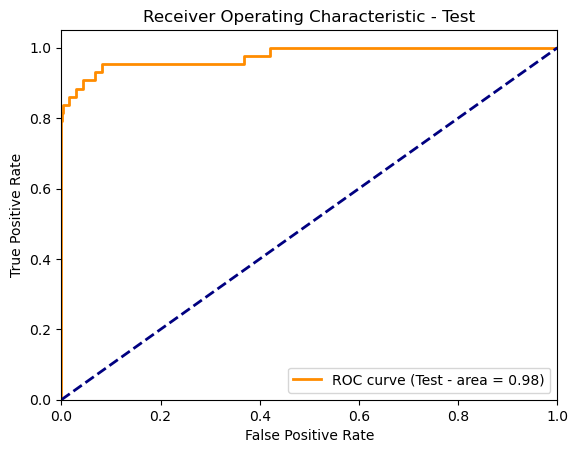

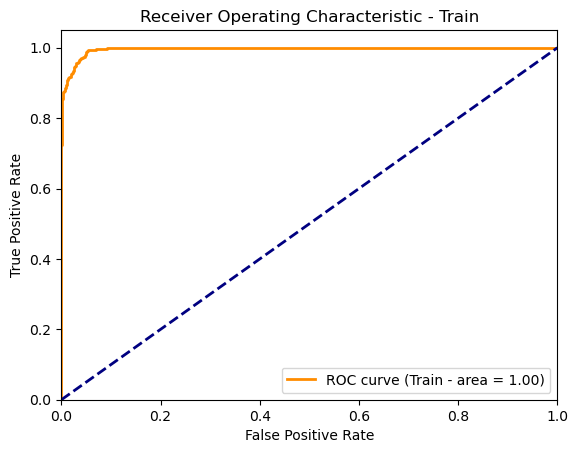

,Model,Dataset,Accuracy,F1 Score,Precision,Recall,AUC Score
0,EasyEnsemble,Train,0.968609,0.552479,0.388587,0.955457,0.996259
1,EasyEnsemble,Test,0.968699,0.496732,0.345455,0.883721,0.976003


In [4]:
e.train_eval(df_train.drop("Class",axis=1), df_train["Class"], df_test.drop("Class",axis=1), df_test["Class"])

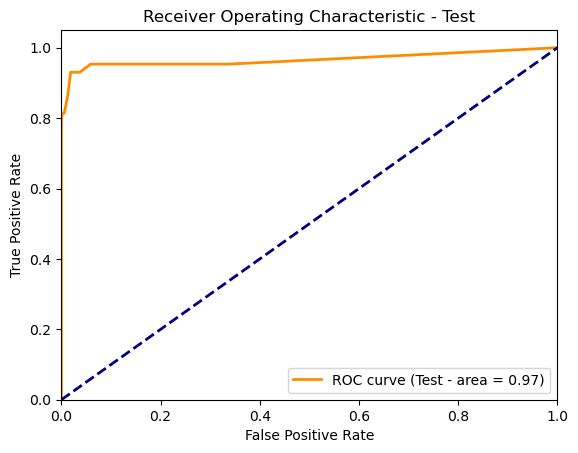

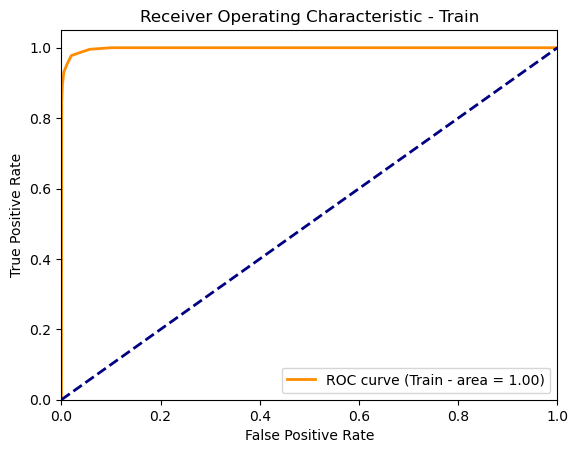

,Model,Dataset,Accuracy,F1 Score,Precision,Recall,AUC Score
0,BalancedBagging,Train,0.979901,0.663643,0.502288,0.977728,0.997932
1,BalancedBagging,Test,0.980488,0.625000,0.470588,0.930233,0.966237


In [3]:
bb = BalancedBagging()
bb.train_eval(df_train.drop("Class",axis=1), df_train["Class"], df_test.drop("Class",axis=1), df_test["Class"])